<a href="https://colab.research.google.com/github/timi1914/Salary_Prediction/blob/main/Copy_of_TIMIPRE_AGENT_SLINK_GROUP_13_CAPSTONE_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [ ]:
df = pd.read_csv("insurance_dataset_capstone.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


## SECTION 1

### Analyzing the data types of the features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.4+ KB


The are 7 variables in the data. 4 of them are of float datatype and the other 3 are strings

### Checking for null values and handling them (if any)

In [ ]:
# Checking for missing values
df.isna().sum()

age         6
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

Age had the most number of missing values (6), with the other columns having just one missing value. Since the missing values are not much, records with missing values will be dropped

In [ ]:
# Dropping all records with missing values
df.dropna(inplace=True)

In [ ]:
# Confirming if all missing vales have been removed
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## SECTION 2

### Checking for duplicates and removing them (if any)

In [ ]:
# Checking for duplicate records
df.duplicated().sum()

1

One duplicate record was found

In [ ]:
# Removing the duplicate record
df.drop_duplicates(inplace = True)

In [ ]:
# Confirming if the duplicate has been removed
df.duplicated().sum()

0

### Checking and Removing Outliers(if any)

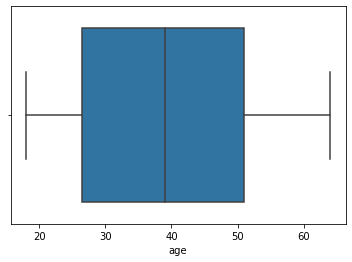

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking for outliers
sns.boxplot(data=df, x= "age")
plt.show()
plt.clf()

There were no outliers for Age

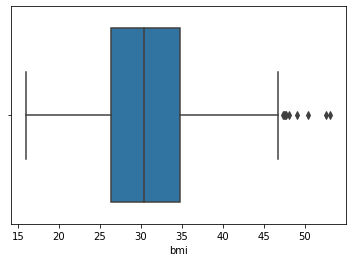

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking for outliers
sns.boxplot(data=df, x= "bmi")
plt.show()
plt.clf()

Outliers were observed for BMI.

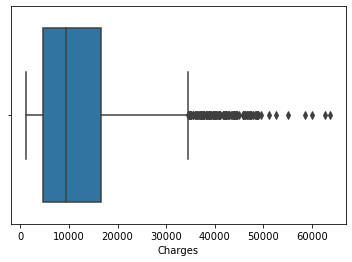

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking for outliers
sns.boxplot(data=df, x= "charges")
plt.xlabel("Charges")
plt.show()
plt.clf()

Outliers were observed for Charges

In [ ]:
"All outliers observed were on above the upper limit for outliers"

# Defining a function for calculating the upper limit for outliers
def outlier_upper_limit(asdf):
    q = list(asdf.quantile([0.25,0.75]))
    z = q[1] + 1.5 * (q[1]-q[0])
    return z


In [ ]:
# Removing outliers of Charges
df2 = df[df["charges"] < outlier_upper_limit(df["charges"])]

# Removing outliers of BMI
df2 = df2[df2["bmi"] < outlier_upper_limit(df["bmi"])]

### Histogram for Numeric Features

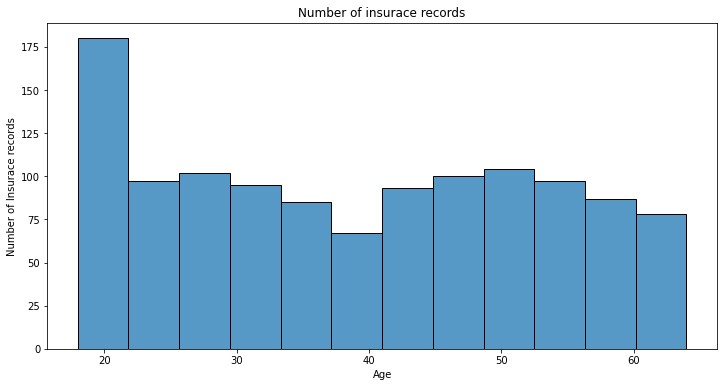

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df2.age)
plt.ylabel("Number of Insurace records")
plt.xlabel("Age")
plt.title("Number of insurace records")
plt.show()

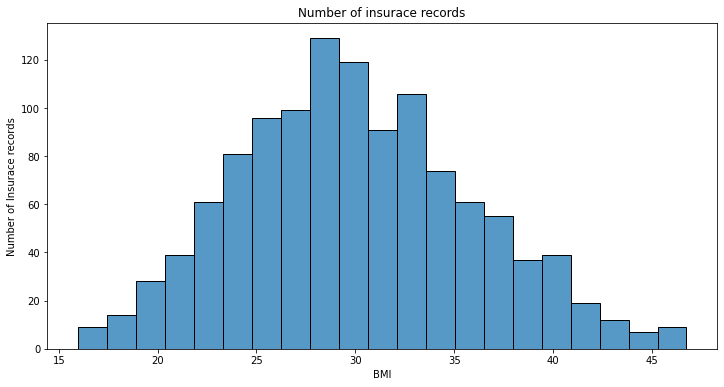

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df2.bmi)
plt.ylabel("Number of Insurace records")
plt.xlabel("BMI")
plt.title("Number of insurace records")
plt.show()

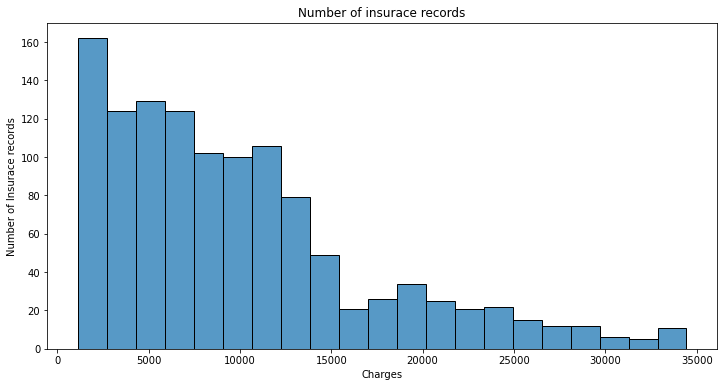

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df2.charges)
plt.ylabel("Number of Insurace records")
plt.xlabel("Charges")
plt.title("Number of insurace records")
plt.show()

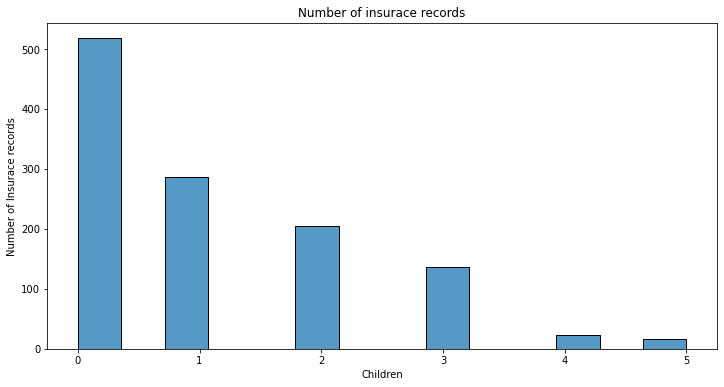

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df2.children)
plt.ylabel("Number of Insurace records")
plt.xlabel("Children")
plt.title("Number of insurace records")
plt.show()

### Countplot for Categorical features

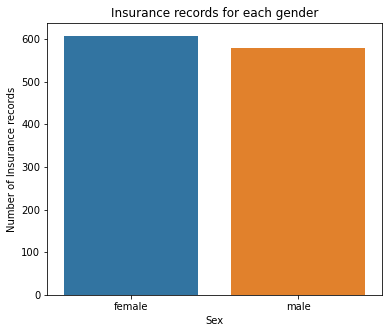

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df2, x="sex")
plt.title("Insurance records for each gender")
plt.xlabel("Sex")
plt.ylabel("Number of Insurance records")
plt.show()

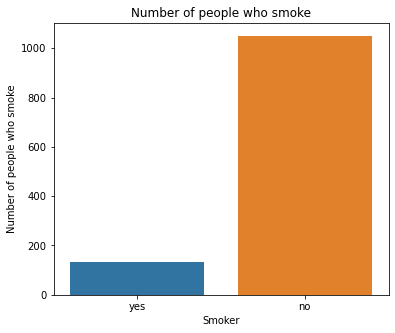

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df2, x="smoker")
plt.title("Number of people who smoke")
plt.xlabel("Smoker")
plt.ylabel("Number of people who smoke")
plt.show()

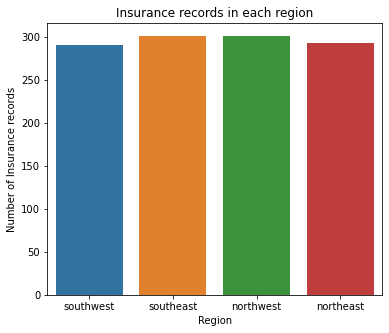

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df2, x="region")
plt.title("Insurance records in each region")
plt.xlabel("Region")
plt.ylabel("Number of Insurance records")
plt.show()

## SECTION 3

### Skewness for Numerical variables

In [ ]:
from scipy.stats import skew

# Defining a function that calculates skewness
def skewness(variable):
    print(f" The Skewness of {variable} is {skew(df2[variable], bias = True)}")

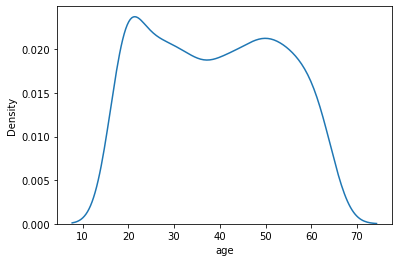

 The Skewness of age is 0.06794045129128948


In [ ]:
sns.kdeplot(data=df2, x="age")
plt.show()
skewness("age")

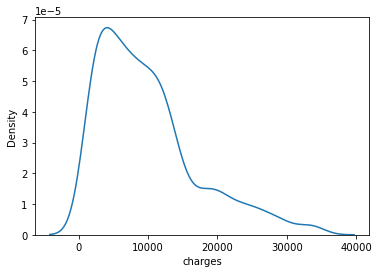

 The Skewness of charges is 1.170081563830796


In [ ]:
sns.kdeplot(data=df2, x="charges")
plt.show()
skewness("charges")

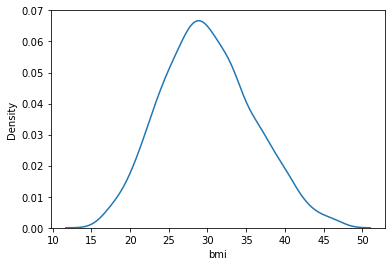

 The Skewness of bmi is 0.25641560679428543


In [ ]:
sns.kdeplot(data=df2, x="bmi")
plt.show()
skewness("bmi")

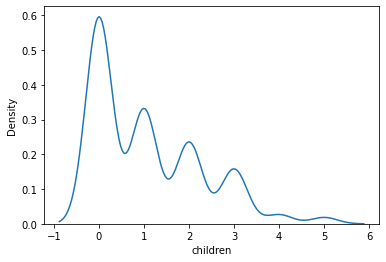

 The Skewness of children is 0.9700375083900552


In [ ]:
sns.kdeplot(data=df2, x="children")
plt.show()
skewness("children")

### Correlation between numerical variables shown by a heat map

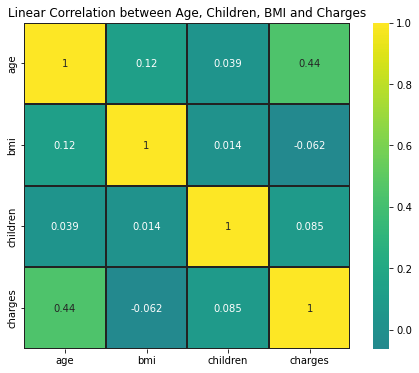

In [ ]:
# Plotting the Correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(data=df2.corr(), annot=True,
                center=0,
                cmap='viridis',
                square = True,
                linewidth = 0.1,
                linecolor = "#222")
plt.title("Linear Correlation between Age, Children, BMI and Charges")
plt.show()

Only age has a strong positive correlation with Charges. Children and BMI have no linear relationship with neither Charges, Age nor with each other.

### Scatter plot showing the relationship between Age, Charges and Smoker

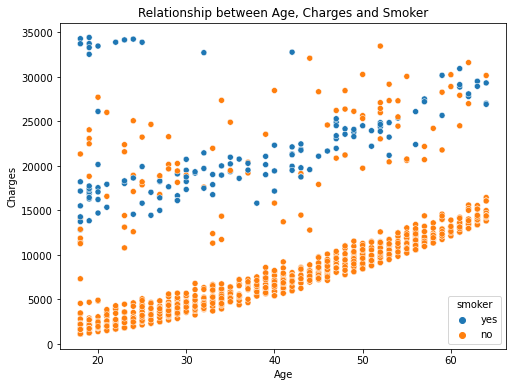

In [ ]:
# PLOTTING THE RELATIONSHIP BETWEEN BMI, AGE AND SEX
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df2, x="age", y="charges", hue="smoker")
ax.set_title("Relationship between Age, Charges and Smoker")
ax.set_xlabel("Age")
ax.set_ylabel("Charges")
plt.show()

There is Positive correlation between Age and Charges. It can also be observed that non-smokers have lower charges, While smokers have a relatively higher Charges.

### Applying Scaling method on Age, BMI and Children

In [ ]:
# SELECTING AGE, BMI AND CHILDREN AS INDEPENDENT VARIABLES
df3 = df2[["age", "bmi", "children"]]

# IMPORTING A LIBRARY TO SCALE THE SELECTED FEATURES
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# SCALING THE FEARTURES AND STORING THEM IN A DATAFRAME
scaled_independent_vaiables_df = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)

scaled_independent_vaiables_df.head()

,age,bmi,children
0,0.021739,0.387788,0.0
1,0.000000,0.578435,0.2
2,0.217391,0.553426,0.6
3,0.326087,0.219065,0.0
4,0.304348,0.419617,0.0


## SECTION 4

### Encoding categorical variables

In [ ]:
# using cat.codes to encode the categorical variables
df2[["sex", "smoker", "region"]] = df2[["sex", "smoker", "region"]].astype("category")
df2["sex"] = df2["sex"].cat.codes
df2["smoker"] = df2["smoker"].cat.codes
df2["region"] = df2["region"].cat.codes

In [ ]:
# Identifying the codes and their corresponding value
df5 = df.copy()
df5[["sex", "smoker", "region"]] = df5[["sex", "smoker", "region"]].astype('category')
SEX  = dict(enumerate(df5["sex"].cat.categories))
SMOKER = dict(enumerate(df5["smoker"].cat.categories))
REGION  = dict(enumerate(df5["region"].cat.categories))

In [ ]:
SEX

{0: 'female', 1: 'male'}

In [ ]:
SMOKER

{0: 'no', 1: 'yes'}

In [ ]:
REGION

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

## SECTION 5

### Feature Selection using ANOVA selection method

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [ ]:
# Subsetting the Target Variable
target_variable = df2["charges"]

# Subsetting the other variables Bar Charges
predictor_variable= df2.drop(["charges"], axis=1)

# Using ANOVA Method to select features
# Importing the libraries need for the feature selection
from sklearn.feature_selection import f_regression, SelectKBest

# Using SelectKBest to pick the best 4 features
ads = SelectKBest(score_func=f_regression, k=4)

# Determining the F1 Scores
asd_fit = ads.fit(predictor_variable,target_variable)

In [ ]:
# Saving the F1 Scores in a DataFrame
features_score = pd.DataFrame(asd_fit.scores_)
features = pd.DataFrame(predictor_variable.columns)
Feature_score = pd.concat([features, features_score], axis=1)
Feature_score.columns = ["Features", "F_Score"]

In [ ]:
Feature_score.sort_values(by="F_Score", ascending= False)

,Features,F_Score
4,smoker,653.933074
0,age,288.155322
5,region,10.134834
3,children,8.686580
2,bmi,4.622401
1,sex,0.739699


The best 4 features are smoker, Age, region and Children. Hence BMI and Sex will be dropped.

In [ ]:
_4_features_and_regressor_variable = df2.drop(["bmi", "sex"], axis=1)

In [ ]:
_4_features_and_regressor_variable.head()

,age,children,smoker,region,charges
0,19.0,0.0,1,3,16884.92400
1,18.0,1.0,0,2,1725.55230
2,28.0,3.0,0,2,4449.46200
3,33.0,0.0,0,1,21984.47061
4,32.0,0.0,0,1,3866.85520
